<figure>
  <img style="float: left;" src="./figures/unine.png" width="200"/>
</figure>





# Machine Learning Introduction in practice

In this notebook we will cover the some basic concepts of a Machine Learning project through a practical example of Supervised Learning.

In the end of this tutorial you will be able to start your own ML project!

# What is Machine Learning?

Machine Learning is a subfield of Artificial Intelligence.

##### **Goal** :
> Our goal is to create a **model** using the available **data** to solve a specific **task** $T$.

----------------

#### Supervised Learning

In this tutorial will focus on a specific type of machine learning called **Supervised Learning**. Supervised learning is the setting that we have a collection of data points $x$ together whit labels $y$ for the task $T$ we wish to solve. Apart from data points we have a set of potential model that we want to train and finally select the best model to solve our task. The set of models is usually refer as Hypothesis class $H$. The selection of the best model is based on **metric** $M$ that indicates the performance of the model.

##### The main type of Supervised Learning are:
1. **Classification**: where labels y are discrete values each representating a class.
2. **Regression**: where labels y are continuous values such as price.

##### Some popular models for Supervised Learning.
- [Logistic regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) (classification)
- [Linear regression](https://scikit-learn.org/stable/modules/linear_model.html#) (regression)
- [Decision Trees](https://scikit-learn.org/stable/modules/tree.html) (classification & regression)
- [Random Forests](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees) (classification & regression)
- [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html) (classification & regression)
- [k Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html) (classification & regression)
- [Neural Networks](https://www.tensorflow.org/tutorials/keras/classification) (classification & regression)


##### Bellow we illustrate a Classification problem:

![ai_ml](./figures/training.png)

# Typical Supervised Learning Pipeline.
![ml-pipeline](./figures/ml-pipeline.png)

A typical Machine learning pipeline consist of the following steps.

A. **Data**
1. **Data collection**  
    - _In data collection steps we collect or data. Typically we collect data from existing ml data repositories depending on the problem we want to solve. Alternatively we can collect our own dataset either by making experiments or by collect data from the internet e.x data crawling._  
    - Data analysis i the process of getting insides about your data in order to build better model.
2. **Data Analysis & Preprocessing**
    _Data Preprocessing consists of all required steps before we able to use our data to learn a model. Data preprocessing is depends on the dataset we collect on step 1. Data preprocessing is usually a very difficult and time consumming especial when you collect you own dataset. Knowing your data and properly preprocess them is a key part for a successful machine learning project and can dramatically change the performance of the model._
    - handle missing values
    - handle outliers (if needed)
    - feature selection (if needed)
    - data transformation
    - split data into train & test set
    - data scaling/normalization (not always needed).  

B. **Modeling**  

1. **Training**
    - Select your models i.e define the hypothesis space
    - Train your models
2. **Evaluation**
    - Select the best model
    - Assess model performance


Both parts can significantly affect the final model

# Useful python libraries
* numpy : Data handling
* pandas : Data handling
* sklearn : Data handling - Machine Learning
* tensorflow : Machine Learning - Deep Learning
* pytorch : Machine Learning - Deep Learning
* matplotlib: Data analysis - Visualization
* seaborn: Data analysis - Visualization

# Build our own ML pipeline
bellow we will build a machine learning pipeline.

# import python libraries
As a first step we import our python libraries

In [1]:
import random
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(1234)
random.seed(1234)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# A. Data 

## 1. Data collection

![uci ml repo](./figures/UCI_repo.png)
We will use a dataset from [UCI machine learning repository](https://archive.ics.uci.edu/ml/index.php) witch contains a range of datasets.  
We choose wine dataset where our goal is to classify wines in 3 categories based on some attributes.

In [2]:
features = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash",
            "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols",
            "Proanthocyanins", "Color intensity", "Hue",
            "OD280/OD315 of diluted wines", "Proline"]

target = 'Class'

In [3]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=[target] + features)

In [48]:
data.sample(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
81,2,12.72,1.81,2.20,18.8,86,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714
162,3,12.85,3.27,2.58,22.0,106,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570
111,2,12.52,2.43,2.17,21.0,88,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325
82,2,12.08,1.13,2.51,24.0,78,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630
116,2,11.82,1.47,1.99,20.8,86,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495


# 2. Data Analysis & Preprocessing

# A. Data Analysis
In this steps we get familiar with our dataset.

#### A1. Size of our dataset & missing values
The first thing we may want to know is the size of the dataset.  
The number of records and the numbers of features in the dataset help us choose the appropriate model for our analysis.  

In practice:
   1. when we have limited amount of data we use more trandaitional ML models
   2. when we have large dataset whit complex dynamic like images and text, the default choise is Neural Networks
   
Moreover when you have a lot of features you may want to make a dimensionality reduction e.x [pca](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), or select a subset of the available feature i.e [feature selection](https://scikit-learn.org/stable/modules/feature_selection.html) .  

In [5]:
num_records = data.shape[0]
num_features = data.shape[1]
print(f"Number of features {num_features}")
print(f"Number of records {num_records}")

Number of features 14
Number of records 178


##### Missing values
The next thing that we want to know is the missing values.  
In our case we dont have any missing values.

When our dataset contains missing values we can do one of the following:
1. drop a whole columns if the pecetange of missing value exceed a spesific theshold.
2. drop the rows that contains a missing values if that dont dramaticaly reduce your available dataset.
3. fill the missing values i.e [data imputation](https://scikit-learn.org/stable/modules/impute.html). Data imputation is a separate field in ML and in general is not trivial and can harm the performance of your models. One relative simple method is to replace the missing values with the average value of the feature.

In [6]:
# percentage of rows that contains missing values
data.isna().any(axis=1).mean()

0.0

In [7]:
# missing values of each feature
data.isna().mean()

Class                           0.0
Alcohol                         0.0
Malic acid                      0.0
Ash                             0.0
Alcalinity of ash               0.0
Magnesium                       0.0
Total phenols                   0.0
Flavanoids                      0.0
Nonflavanoid phenols            0.0
Proanthocyanins                 0.0
Color intensity                 0.0
Hue                             0.0
OD280/OD315 of diluted wines    0.0
Proline                         0.0
dtype: float64

In classification problem we also want our dataset to be as ballance as posible for each class.
Intuitivly we will not be able to learn much for an under represented class.
If our dataset has a huge difference in each class an easy aproch is to eigther upsampling the underrepresented classes or downsample the majority classes.

Bellow we can see that our classes is fairly balanced.

In [8]:
data['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

#### A2. Dataset Description

In this step we get a some more inside regarding the basic statistic and the type of our data.  
In this particular case we have only numerical data so additional preparation is not needed.  
In general when we have a dataset that contains categorical features we may want to make additional preparation like [One Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).
or [label encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [9]:
data.dtypes.T

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

Next we can have some basic statistics of our dataset. This together with the proper vizualization can help us idetify problems in our dataset.  
One of those problems is outliers that are typically exist in dataset from digital measurements. The most common way to identify them is ussing basic statistic like mean, std and percentiles or some plots.  
Another common problem is feature with no information i.e small relative variance. You can image a feature that is constant in every record.  

In [10]:
data.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
1%,1.000000,11.440800,0.897700,1.700000,11.354000,78.000000,1.138500,0.470000,0.140000,0.420000,1.863200,0.547700,1.290000,306.940000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
99%,3.000000,14.472800,5.542200,2.989000,28.500000,141.760000,3.595900,3.791400,0.630000,3.033600,11.018500,1.426900,3.843000,1522.360000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Bellow we make plots ussing seaborn & matplotlib python libraries.
You can check a list of available plots in [seaborn galery](https://seaborn.pydata.org/examples/index.html)

<Figure size 1200x1200 with 0 Axes>

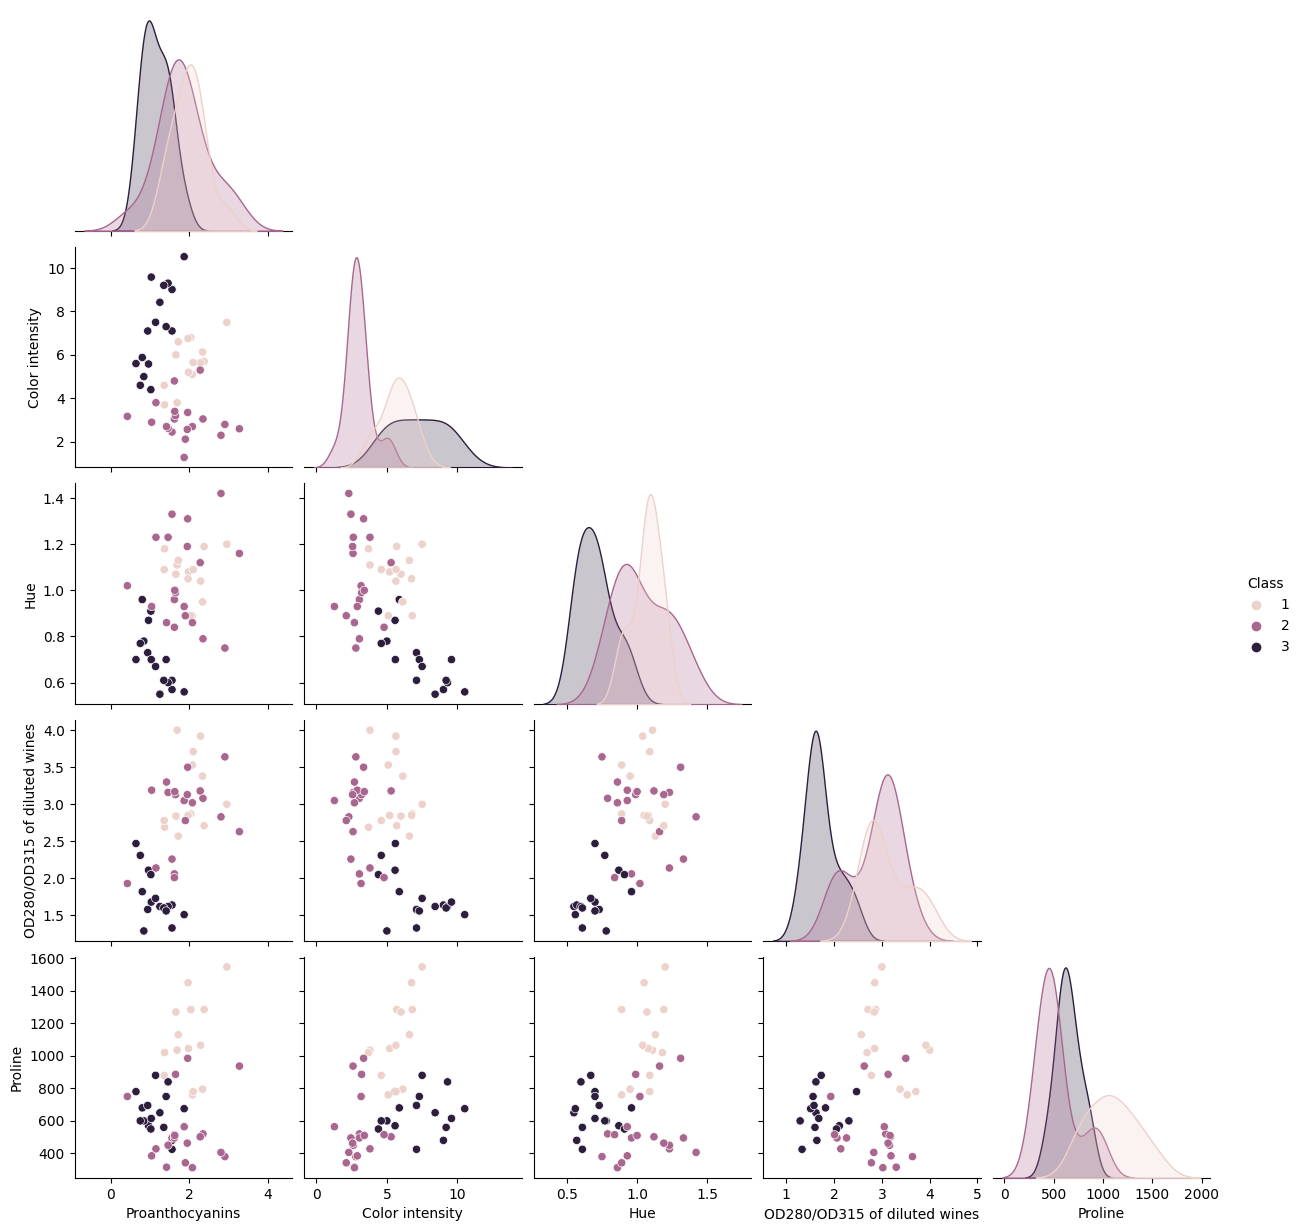

In [11]:
# #note that we sample a fraction of dataset because pairplot while give us a lot of information it requires a lot of computational power.
plt.figure(figsize=(12,12))
sns.pairplot(data[features[8:]+["Class"]].sample(50), hue="Class", corner=True)
plt.show()
plt.close()

bellow we make the same kind of plots using matplotlib.  

We can empirically observe that points are quite separatable even when vizualize 2 variable.  
In general it is difficult to make conclusion when we have a hight dimensional vector.  

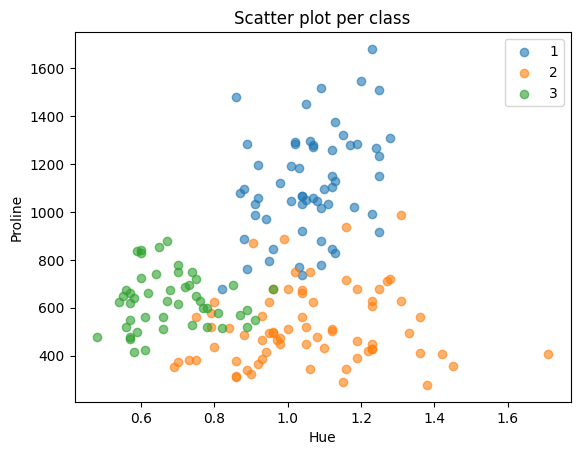

In [12]:
# scatter plots
plt.figure()
for class_c, data_c in data.groupby('Class'):
    plt.scatter(data_c["Hue"], data_c["Proline"],alpha=0.6, label=class_c)

plt.legend()
plt.xlabel('Hue')
plt.ylabel('Proline')
plt.title('Scatter plot per class')
plt.show()
plt.close()

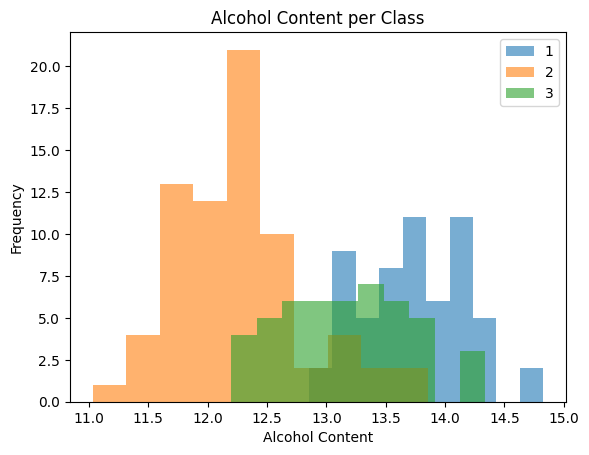

In [13]:
plt.figure()
for class_c, data_c in data.groupby('Class'):
    data_c.Alcohol.plot.hist(label=class_c, alpha=0.6)
plt.legend()
plt.xlabel('Alcohol Content')
plt.title('Alcohol Content per Class')
plt.show()
plt.close()

from the above we can summarize that.


# A3. Split Dataset

A very important part in order to evaluate the result of our algorithm is to design the evaluation protocol.  
In general we want to test our algorithm performance on a set not seen while training.
Intuitively this will also happent if we use our model in a real senario, we will use our model to make estimations about unseen data.

To do so we can split our dataset into a training set and test set.

![split_train_test](./figures/split_train_test.png)

##### **Q1**: how do we properly split our dataset?
#### Machine learning assumption
A general assumption that is made in almost every machine learning method, is that the model will be tested in samples comming from the same distribution i.e so our point (x,y) are independent and identically distributed. You can think of it as the dataset is created from the same generative mechanism.


_So:_
1. The train and the test distribution must be similar, $P_{train}(x,y) \sim P_{test}(x,y)$
2. If we try to test our algorithm in a different distribution there are not guaraties about our model performance.

_In practice:_
1. To achieve similar distribution we shuffle our dataset before we split.
2. We need as much data as possible. 
3. A standard approach is to keep the 80% of the dataset for training and the 20% of the dataset for testing.

We will suppose that we don't have access to this test set until the final evaluation of the model.

In [14]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.3, shuffle=True)

# A.4 Data scaling

Note that different feature has different scales and that may affect the algorithm performance.  
There are algorithms that not affecting from features scales.

The most common method to scale your dataset are listed bellow.
1. min-max scaling
    * $x_{scaled} = (x - min) / (max-min)$
    * $x_{scaled} \in [0,1]$
    * not good techinique when you have outliers
2. standard scaling
   * $x_{scaled} = (x - mean) / std$
   * $mean(x_{scaled}) = 0$
   * $std(x_{scaled}) = 1$
   * robust to outliers

In [15]:
mean, std = train_data[features].mean(), train_data[features].std()
min_x, max_x = train_data[features].min(), train_data[features].max()

In [16]:
train_scaled_standar_scaler = (train_data[features] - mean[features]) / std[features]
train_scaled_min_max_scaler = (train_data[features] - min_x[features]) / (max_x[features]-min_x[features])

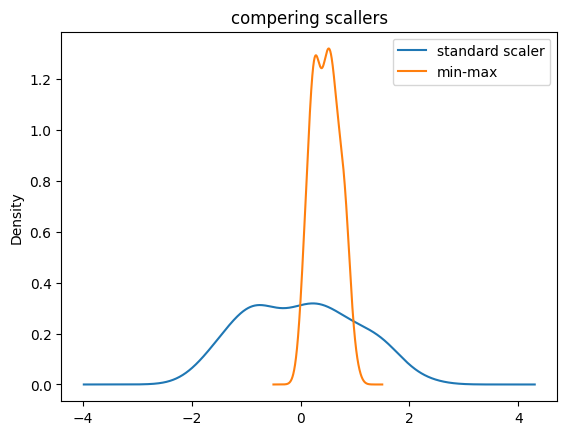

In [17]:
plt.figure()
train_scaled_standar_scaler["Alcohol"].plot.density(label = "standard scaler")
train_scaled_min_max_scaler["Alcohol"].plot.density(label = "min-max")
plt.title("compering scallers")
plt.legend()
plt.show()
plt.close()

In [18]:
del train_scaled_min_max_scaler
del train_scaled_standar_scaler

This can be done easily using sklearn library.
sklearn has already implemented scalers that compute the parameter of each scaler during the fit.
Having a scaler as an object helps us to apply the transformation on different parts of the data.


In [19]:
from sklearn.preprocessing import StandardScaler

# compute the mean and std
standard_scaler = StandardScaler().fit(train_data[features])

# transform method scale the data
train_scaled = pd.DataFrame(data = standard_scaler.transform(train_data[features]),
                            columns = features,
                            index= train_data.index)
train_scaled[target] = train_data[target] # target don't need scaling

# apply transform to scale also the test data
test_scaled = pd.DataFrame(data = standard_scaler.transform(test_data[features]),
                           columns = features,
                           index=test_data.index)
test_scaled[target] = test_data[target]

<Figure size 640x480 with 0 Axes>

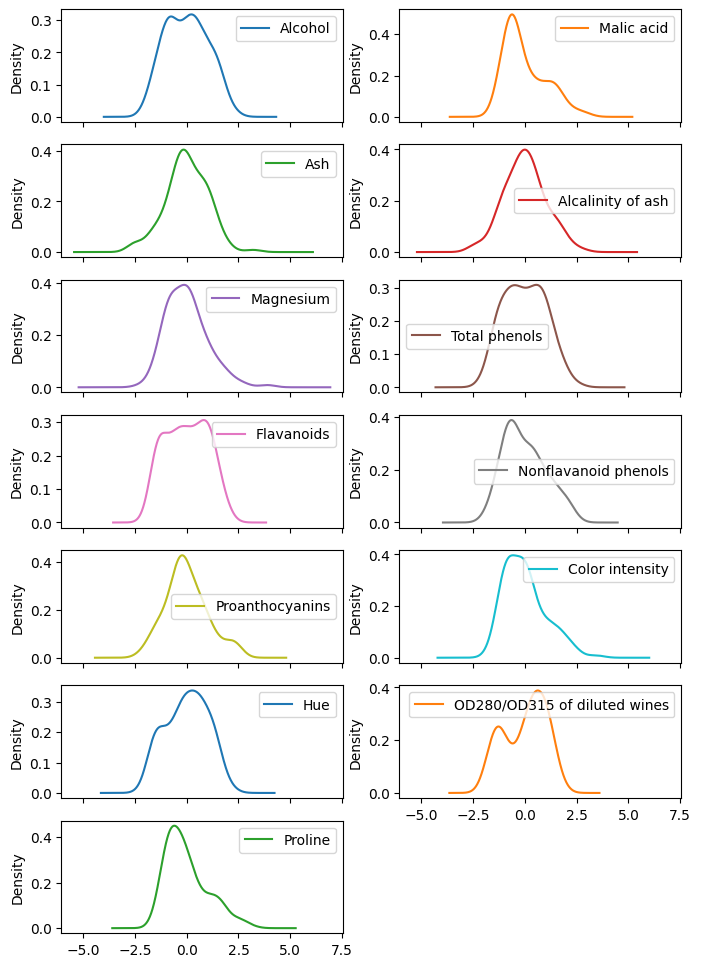

In [20]:
plt.figure()
train_scaled[features].plot.density(subplots=True, 
                                    layout=(7, 2),
                                    figsize=(8,12),
                                    sharex=True,
                                    sharey=False)
plt.show()
plt.close()

we can also inverse the transformation.

In [21]:
standard_scaler.inverse_transform(train_scaled[features])

array([[1.288e+01, 2.990e+00, 2.400e+00, ..., 7.400e-01, 1.420e+00,
        5.300e+02],
       [1.438e+01, 1.870e+00, 2.380e+00, ..., 1.200e+00, 3.000e+00,
        1.547e+03],
       [1.475e+01, 1.730e+00, 2.390e+00, ..., 1.250e+00, 2.730e+00,
        1.150e+03],
       ...,
       [1.267e+01, 9.800e-01, 2.240e+00, ..., 1.230e+00, 3.160e+00,
        4.500e+02],
       [1.305e+01, 3.860e+00, 2.320e+00, ..., 8.400e-01, 2.010e+00,
        5.150e+02],
       [1.233e+01, 9.900e-01, 1.950e+00, ..., 1.060e+00, 2.310e+00,
        7.500e+02]])

# B. Modeling
in this part we will train our models and finaly select the best one.

# Model selection

As you may already know, different models have some parameters you can select by hand.  
These parameters are called /hyperparameters/ and we have to tune them in the training process.  
For example the number of /k/ in the knn model is a hyperparameter. 

##### Q1: How do we choose the hyperparameter of each model?

#### Grid search - exustive search
A common strategy is to define a set of different values for each specific hyperparameter.  
Then we can train all combinations and finally choose the best one.

##### Q2: How do we choose the best model?

![split_train_test](./figures/split_train_test.png)

#### The problem of training & test setup.
One know issue of learning on the training set and evaluate on the testset is that in many case we can overfit the testset.
This mean that selecting models and hyperameters based on the performance on the test set introduce bias in the model selection prossec.
This will affect the performance of the algorithms on the test set and thus our estimate of the generalization error will be biased.

A method to overcome this problem, we can create a new set called validation set.  

Finally we have the:
1. *training set* - that we train is used to train our models
2. *validation set* - that is used to select the best model
3. *test set* - that gives us an ubiased estimate about the future performance of our model

![train val test set](./figures/split_train_val_test.png)

In [22]:
train_scaled_tmp, val_data = train_test_split(train_scaled, test_size=0.1)

In [23]:
print(f"Number of training data: {train_scaled_tmp.shape[0]}")
print(f"Number of validation data: {val_data.shape[0]}")

Number of training data: 111
Number of validation data: 13


## Model training

Now we can try to train our models.

We will follow the following steps
1. Define the different model for training
2. Train our models using the training set
3. Select the best model based on validation set
4. Take an estimate of model performance on test set

#### 1. Define set of available models
Lest begin by define the set of available models.
As an example we will consider the set of kNN model with different hyperparameter k.
This will be our Hypothesis space $H$ .

In [24]:
from sklearn.neighbors import KNeighborsClassifier

ks = range(3, 100)
hypothesis_space = [KNeighborsClassifier(n_neighbors=k) for k in ks]

#### 2. Train our models

In [25]:
for model in hypothesis_space:
    model.fit(X = train_scaled_tmp[features],
              y = train_scaled_tmp[target])

#### 3. Select the best model

In [26]:
from sklearn.metrics import accuracy_score

validation_scores = []
for model in hypothesis_space:
    val_score = accuracy_score(y_true = val_data[target],
                               y_pred = model.predict(val_data[features]))
    validation_scores.append(val_score)

In [27]:
best_model_index = np.argsort(validation_scores)

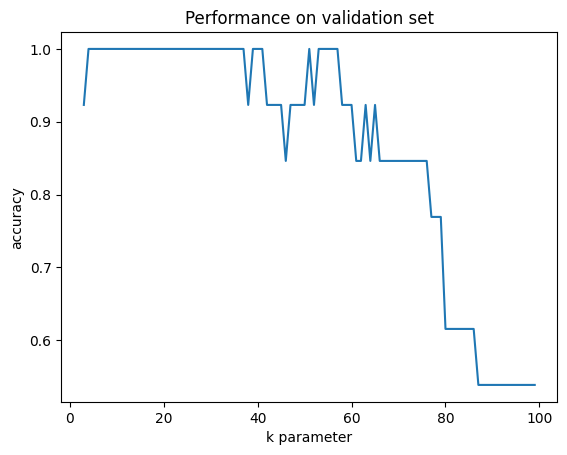

In [28]:
plt.figure()
plt.plot(ks, validation_scores)
plt.xlabel("k parameter")
plt.ylabel("accuracy")
plt.title("Performance on validation set")
plt.show()
plt.close()

Now we will compare the validation error with the test error.  
We want that validation error to be similar with test error.  
If that hold we can select model based on validation set and report the test error.  

In [29]:
test_scores = []
for model in hypothesis_space:
    test_score = accuracy_score(y_true = test_scaled[target],
                                y_pred = model.predict(test_scaled[features]))
    test_scores.append(test_score)

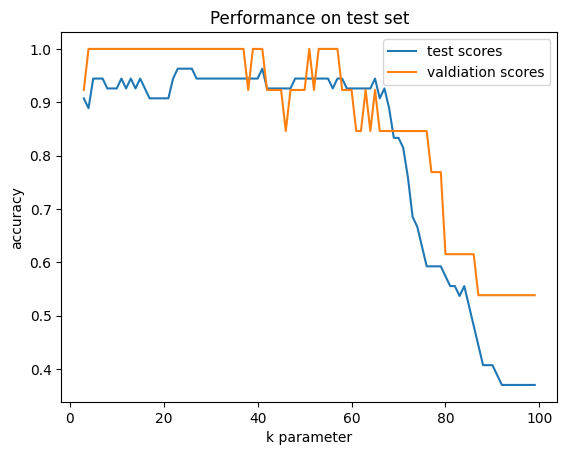

In [30]:
plt.figure()
plt.plot(ks, test_scores,label="test scores")
plt.plot(ks, validation_scores,label="valdiation scores")
plt.legend()
plt.xlabel("k parameter")
plt.ylabel("accuracy")
plt.title("Performance on test set")
plt.show()
plt.close()

#### Problem with validation set.

From the figure we can observe some drawbacks of our method.
1. we can see that validation set does not estimate well the performance on the test set.
2. Validation error overestimate test error.
3. It's difficult for us to select the best model

#### Why?

1. in our example validation set contains a few example.

## Resampling methods for model selection

In practive partisioning the dataset into 3 different dataset requires a lot of records.
When our dataset has limited amount of points a good alternative is to use resampling methods for model selection.

Note that this method requires at least a training and testset.  
Then we will applying reshaping techniques to select models using only training.  
After select the best model we will again use the test set to have an unbiased estimate about the model perfomance.

The most common techiques are:

1. **Cross validation** - most popular
2. **Bootstraping**

## A. cross validation

The most popular cross validation techique is k-fold cross validation.  
k-fold cross validation split the training set into k sets as ilustrated bellow.  

![cross-validation](./figures/kfold_cross_validation.png)

We can then train a model k times.  

1. for k times:  
   * Train model using $k-1$ of the folds.  
   * Evaluate the model on the held out fold.  

2. average the perfmonace on the k evaluation sets
3. Finally we can select the model with the best average error.
4. Estimate the perfomance on the test set

In [49]:
ks = range(3, 100)
hypothesis_space = [KNeighborsClassifier(n_neighbors=k) for k in ks]

In [50]:
from sklearn.model_selection import cross_val_score

k_fold_scores = [cross_val_score(estimator=model, X=train_scaled[features], y=train_scaled[target], cv=10) 
                 for model in hypothesis_space]

In [51]:
mean_score = np.array([np.mean(k_fold_score) for k_fold_score in k_fold_scores])
std_score = np.array([np.std(k_fold_score) for k_fold_score in k_fold_scores])

In [52]:
mean_score

array([0.97564103, 1.        , 0.99166667, 0.99166667, 0.98333333,
       0.98333333, 0.975     , 0.98333333, 0.98333333, 0.98333333,
       0.98333333, 0.98397436, 0.98397436, 0.98397436, 0.97564103,
       0.98397436, 0.99166667, 0.98397436, 0.975     , 0.98333333,
       0.975     , 0.98397436, 0.98333333, 0.97564103, 0.98333333,
       0.98333333, 0.98333333, 0.99166667, 0.98333333, 0.99166667,
       0.99166667, 0.99166667, 0.99166667, 0.98397436, 0.98397436,
       0.98397436, 0.99166667, 0.98397436, 0.99166667, 0.99166667,
       0.99166667, 0.98333333, 0.98333333, 0.98333333, 0.98333333,
       0.98333333, 0.99166667, 0.99166667, 0.99166667, 0.98397436,
       0.98333333, 0.96794872, 0.97628205, 0.97628205, 0.96794872,
       0.96794872, 0.94423077, 0.95192308, 0.95192308, 0.94423077,
       0.93653846, 0.92115385, 0.91346154, 0.88974359, 0.87371795,
       0.84935897, 0.83269231, 0.82435897, 0.77564103, 0.75128205,
       0.74294872, 0.71025641, 0.67820513, 0.66217949, 0.66217

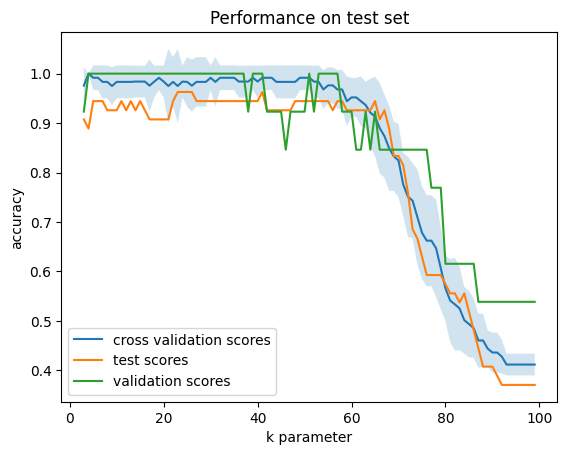

In [34]:
plt.figure()
# plot average error on k fold together with the std.
plt.plot(ks, mean_score,label="cross validation scores")
plt.fill_between(ks, 
                 mean_score - std_score,
                 mean_score + std_score,
                 alpha=0.2)
plt.plot(ks, test_scores,label="test scores")
plt.plot(ks, validation_scores,label="validation scores")
plt.legend()
plt.xlabel("k parameter")
plt.ylabel("accuracy")
plt.title("Performance on test set")
plt.show()
plt.close()

In [35]:
best_model_index = np.argmax(mean_score)
best_k = ks[best_model_index]

In [36]:
best_cv_model = KNeighborsClassifier(n_neighbors=best_k)
best_cv_model.fit(train_scaled[features],train_scaled[target])

KNeighborsClassifier(n_neighbors=4)

Then we can take an estimate of the error using the test set.

In [37]:
final = accuracy_score(y_true=test_scaled[target],
                       y_pred=best_cv_model.predict(test_scaled[features]))

In [38]:
print("Final accuracy estimate of the model:", final)

Final accuracy estimate of the model: 0.9074074074074074


## B. Bootstrapping

Bootstrapping is another effective method for model selection when we have not enough amount of data.
In general bootstrapping is any method that use sampling with replacement to estimate a metric.
In our case we want to estimate the test error of different models and finaly select the model with the lower estimate.

![boostraping model selection](./figures/boostraping_model_selection.png)

1. Sample n data points, with replacement, as training set (the bootstrap).
    * We have n different data points
    * On average, bootstraps include 66% unique records (some are duplicates)
    
2. Use the rest of the datapoints for validation set.
    * So we have 34% of the data for validation

3. Calculate metric
    * we have to train our models
    * evaluate them.
    
4. Repeat  times to obtain  scores

After the end of the prossec we will have a distribution of the desired metric.
In our case the perfomance of the clasifiers. We have one distribution for each clasifiers.

We can then compare the distribution and to select the best one.

One simple method to chooose is to choose the model with the smaller average perfomance. If there are multiple models we can as well select the model with the lower variance.

In [39]:
import sklearn.utils

n_boostrap_iterations = 100

boostrap_acc = []
for n in range(n_boostrap_iterations):
    # 1. reshample with replacement=True ~ 66% unique records.
    train_data_tmp = sklearn.utils.resample(train_scaled, 
                                            replace = True,
                                            n_samples = train_scaled.shape[0])
    
    train_index = train_data_tmp.index.drop_duplicates()
    
    # 2. use the rest values for validation set ~ 33%
    val_index = train_scaled.index.difference(train_index)
    val_data_tmp = train_scaled.loc[val_index]
    
    # 3. calculate metric
    iter_accuracy = []
    for m in hypothesis_space:
        m.fit(X = train_data_tmp[features],
              y = train_data_tmp[target])
        iter_accuracy.append(accuracy_score(y_true=val_data_tmp[target],
                                            y_pred=m.predict(val_data_tmp[features])))
    boostrap_acc.append(iter_accuracy)
    
    # 4. repeat n times.
boostrap_acc = np.array(boostrap_acc)

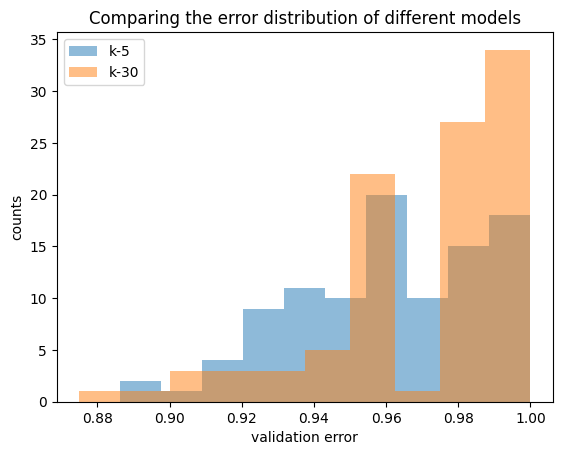

In [55]:
plt.figure()
plt.hist(boostrap_acc[:,3], alpha = 0.5, label= "k-5")
plt.hist(boostrap_acc[:,33], alpha = 0.5, label= "k-30")
plt.legend()
plt.xlabel("validation error")
plt.ylabel("counts")
plt.title("Comparing the error distribution of different models")
plt.show()
plt.close()

In [41]:
# calculate mean and std for the different models
boostrap_mean_scores = np.mean(boostrap_acc, axis=0)
boostrap_std_scores = np.std(boostrap_acc, axis=0)

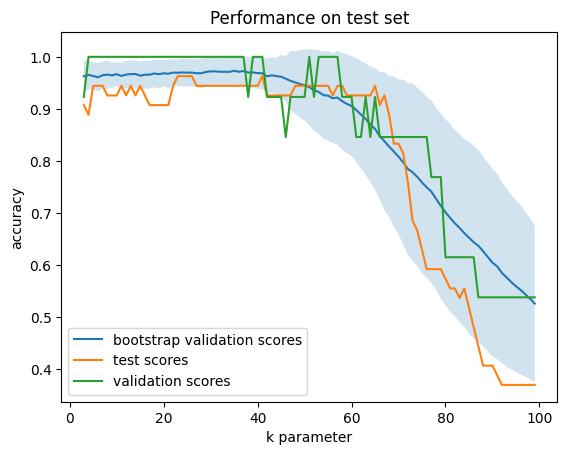

In [42]:
plt.figure()
# plot mean together with std for each classifier.
plt.plot(ks, boostrap_mean_scores, label="bootstrap validation scores")
plt.fill_between(ks, 
                 boostrap_mean_scores - boostrap_std_scores,
                 boostrap_mean_scores + boostrap_std_scores,
                 alpha=0.2)

plt.plot(ks, test_scores,label="test scores")
plt.plot(ks, validation_scores,label="validation scores")
plt.legend()
plt.xlabel("k parameter")
plt.ylabel("accuracy")
plt.title("Performance on test set")
plt.show()
plt.close()

In [43]:
boostrap_best_model = np.argmax(boostrap_mean_scores)
boostrap_best_k = ks[boostrap_best_model]
print("Best k using bootstrap:",boostrap_best_k)

Best k using bootstrap: 35


now we can train the best model with all the available dataset.

In [44]:
best_boostrap_model = KNeighborsClassifier(n_neighbors=boostrap_best_k)
best_boostrap_model.fit(train_scaled[features], train_scaled[target])

KNeighborsClassifier(n_neighbors=35)

In [45]:
final_acc_boostrap = accuracy_score(y_true=test_scaled[target],
                                    y_pred=best_boostrap_model.predict(test_scaled[features]))
print("Final accuracy estimate of the model:", final_acc_boostrap)

Final accuracy estimate of the model: 0.9444444444444444


# Ussing Boostraping to improve model performance

Boostraping can be used also to improve model perfomance.

We can train k classfiers using k different bootstrapped datasets.
After the training we can bag those classifier to create an [ensemble](https://scikit-learn.org/stable/modules/ensemble.html) of clasifiers.

Then we can aggregate the results of different classifiers e.x mojority votting.


![esembles](./figures/ensembles.png)

In [46]:
from sklearn.ensemble import BaggingClassifier

bagging_cfg_knn = BaggingClassifier(base_estimator= KNeighborsClassifier(n_neighbors=boostrap_best_k),
                                    bootstrap_features=True,
                                    n_estimators=1000)

bagging_cfg_knn.fit(X = train_scaled[features],
                    y = train_scaled[target])

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=35),
                  bootstrap_features=True, n_estimators=1000)

In [47]:
final_acc_boostrap = accuracy_score(y_true=test_scaled[target],
                                    y_pred=bagging_cfg_knn.predict(test_scaled[features]))

print("Final accuracy estimate of the model:", final_acc_boostrap)

Final accuracy estimate of the model: 0.9629629629629629


# Using Boostraping to improve test estimates

following the same idea we can also use boostraping to improve estimates of the test error.

So you can try to fill the code bellow and compare your estimates with the pervius test scores.

In [ ]:
n_boostrap_iterations = 100

boostrap_test_acc = []
for n in range(n_boostrap_iterations):
    
    # 1. reshample testset with replacement=True.    
    # add your code here
    
    # 2. calculate metric for the differnt model in your hypothesis class
    # add your code here
    
    # 3. store the score in a list
    boostrap_test_acc.append(iter_accuracy)

# convert to numpy array
boostrap_test_acc = np.array(boostrap_test_acc)

In [ ]:
# calculate the mean
boostrap_test_mean_scores = # add you code here
# calculate the std
boostrap_test_std_scores = # add you code here

In [ ]:
# plot the old test score together with the new estimates of test set.

plt.figure()
# 1, plot the new test score, mean together with std for each classifier.
# add your code here

plt.plot(ks, test_scores,label="test scores")
plt.legend()
plt.xlabel("k parameter")
plt.ylabel("accuracy")
plt.title("Performance on test set")
plt.show()
plt.close()

In [ ]:
plt.figure()
# 1, plot the validation, mean together with std for each classifier.
plt.plot(ks, boostrap_mean_scores, label="bootstrap validation scores")
plt.fill_between(ks, 
                 boostrap_mean_scores - boostrap_std_scores,
                 boostrap_mean_scores + boostrap_std_scores,
                 alpha=0.2)

# 1, plot the new test score, mean together with std for each classifier.
# add your code here

plt.legend()
plt.xlabel("k parameter")
plt.ylabel("accuracy")
plt.title("Performance on test set")
plt.show()
plt.close()